In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
sales_trends_df = pd.read_excel('../data/sales_trends.xlsx')

In [24]:
# Group by date
date_grouped_df = sales_trends_df.groupby('date').agg({
    'transaction_id': np.size,  # Count of transactions
    'transaction_qty': np.sum,  # Total quantity of items sold
    'income': np.sum            # Total income
}).reset_index()

date_grouped_df.head()

/var/folders/1x/jp3vqcs53vv9kxc9f40hgztc0000gn/T/ipykernel_17110/1737275354.py:2: FutureWarning: The provided callable <function sum at 0x1104f3ce0> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  date_grouped_df = sales_trends_df.groupby('date').agg({


,date,transaction_id,transaction_qty,income
0,2023-01-01,550,802,2508.20
1,2023-01-02,566,790,2403.35
2,2023-01-03,582,823,2565.00
3,2023-01-04,497,726,2220.10
4,2023-01-05,547,778,2418.85


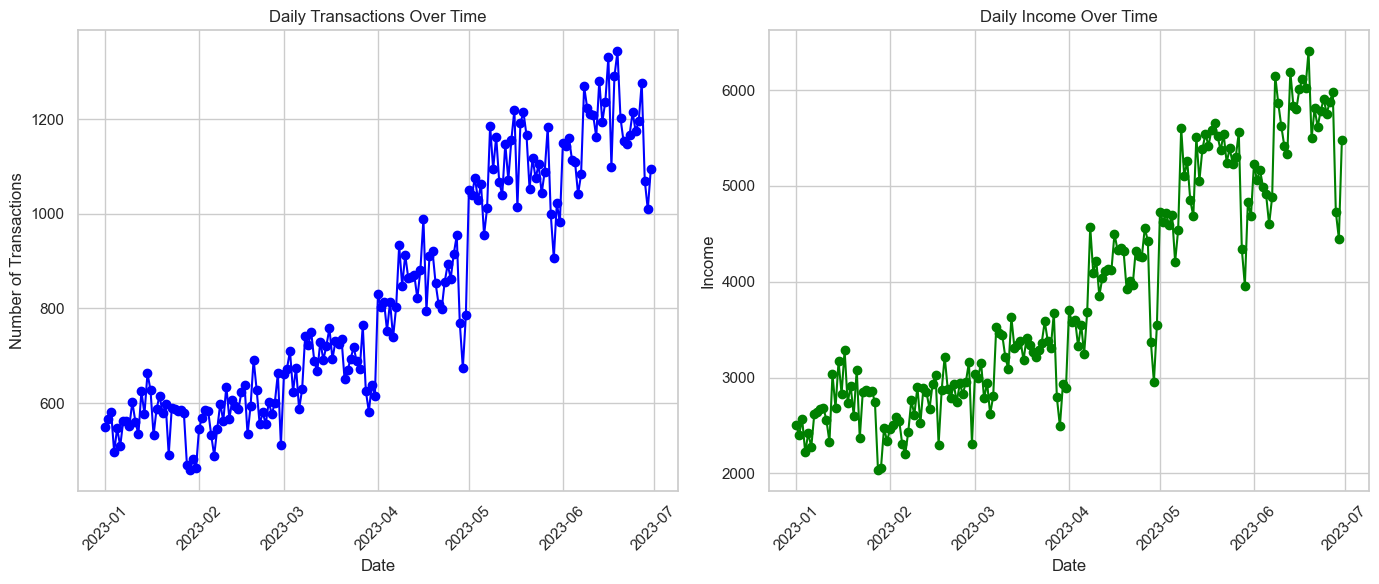

In [25]:
# Set the aesthetics for the plots
sns.set_style("whitegrid")

# Create a figure with specified size
plt.figure(figsize=(14, 6))

# Plotting transactions over time
plt.subplot(1, 2, 1)
plt.plot(date_grouped_df['date'], date_grouped_df['transaction_id'], color='blue', marker='o', linestyle='-')
plt.title('Daily Transactions Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)

# Plotting income over time
plt.subplot(1, 2, 2)
plt.plot(date_grouped_df['date'], date_grouped_df['income'], color='green', marker='o', linestyle='-')
plt.title('Daily Income Over Time')
plt.xlabel('Date')
plt.ylabel('Income')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


- Daily Transactions Over Time: Shows the fluctuation in the number of transactions on a daily basis.
- Daily Income Over Time: Illustrates how the daily income varies over the same period.

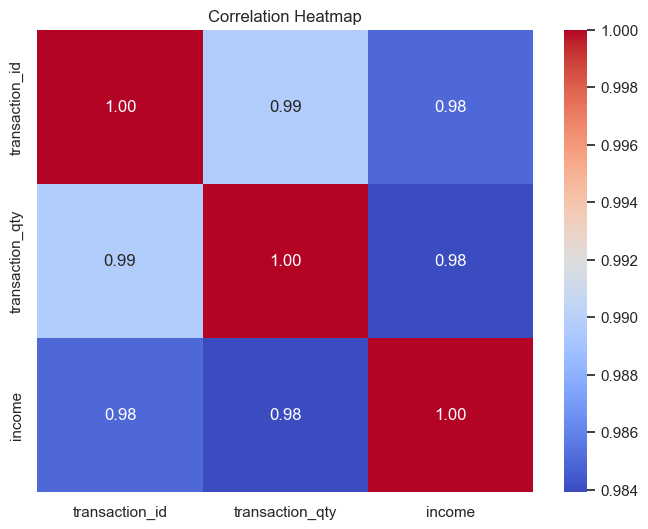

In [26]:
# Compute the correlation matrix for the grouped data
correlation_matrix = date_grouped_df[['transaction_id', 'transaction_qty', 'income']].corr()

# Generate a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


There's a very strong positive correlation between the number of transactions and income. Additionally, this visual helps identify how closely related the transaction quantity is to both the number of transactions and income.